#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

### Task1 : Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [4]:
df.shape 

(148654, 13)

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

### Task2: Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


### Task3: Data Cleaning: Handle missing data by suitable method with explain why you use it

#### first we should know distributon of the column to know which way to fill nan values

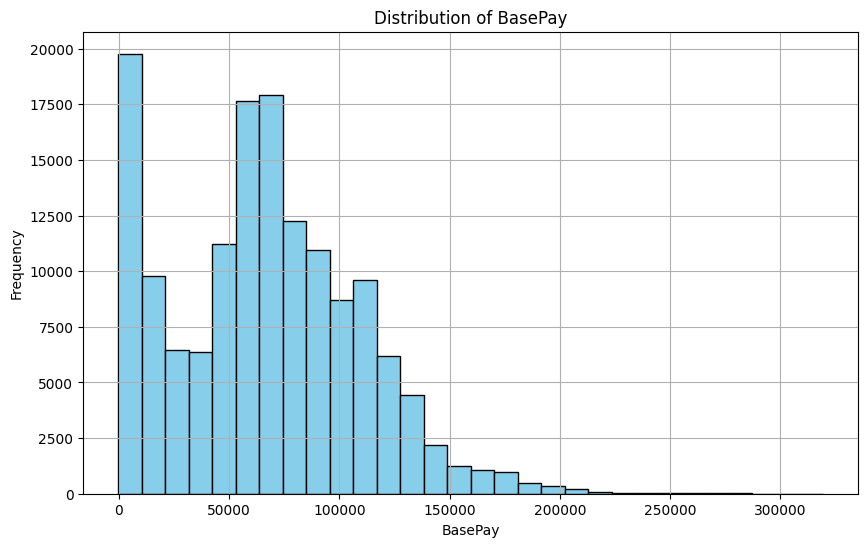

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['BasePay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### distribution is skewed to the right ,so I will choose median to fill nan values as the median is not affected by extreme values.

In [9]:
median_basepay = df['BasePay'].median()
df['BasePay'].fillna(median_basepay, inplace=True)

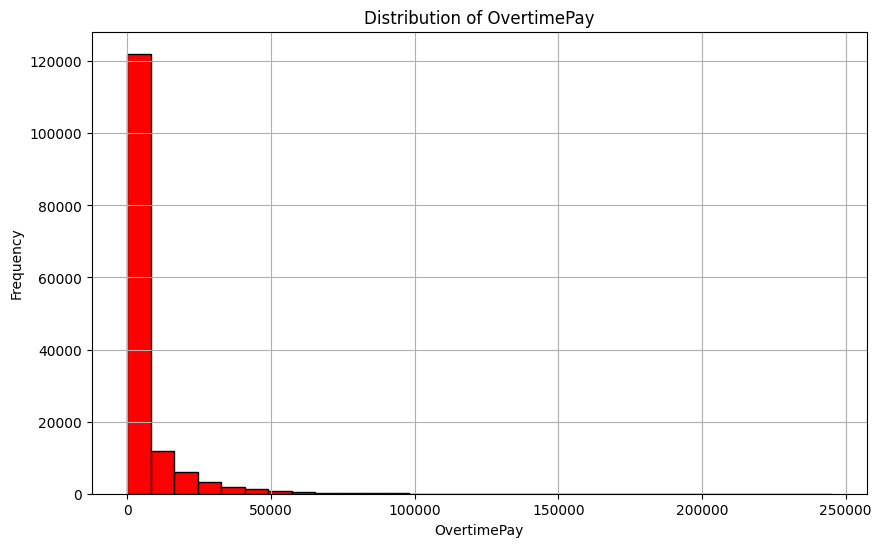

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['OvertimePay'].dropna(), bins=30, color='red', edgecolor='black')
plt.title('Distribution of OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Majority of values is 0 .. so I will choose 0 to fill nan

In [11]:
df['OvertimePay'].fillna(0, inplace=True)

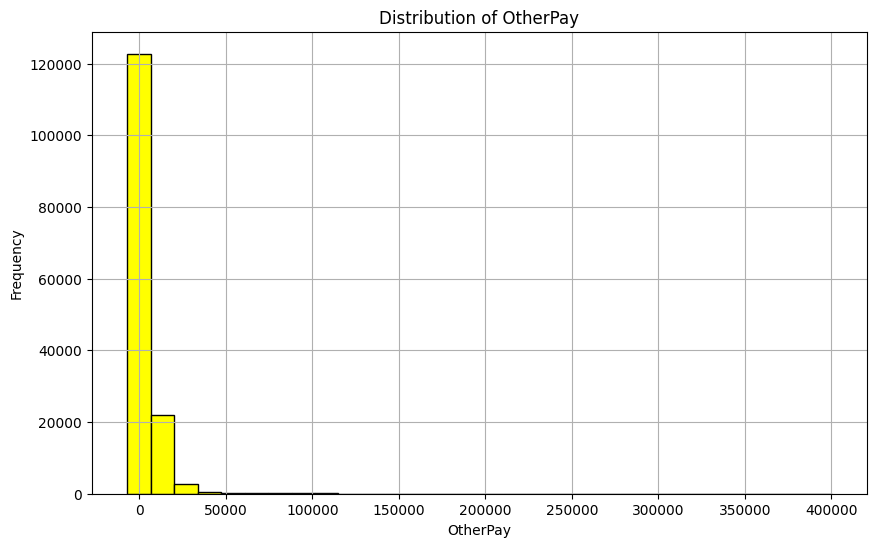

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['OtherPay'].dropna(), bins=30, color='yellow', edgecolor='black')
plt.title('Distribution of OtherPay')
plt.xlabel('OtherPay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Majority of values is 0 .. so I will choose 0 to fill nan

In [13]:
df['OtherPay'].fillna(0, inplace=True)

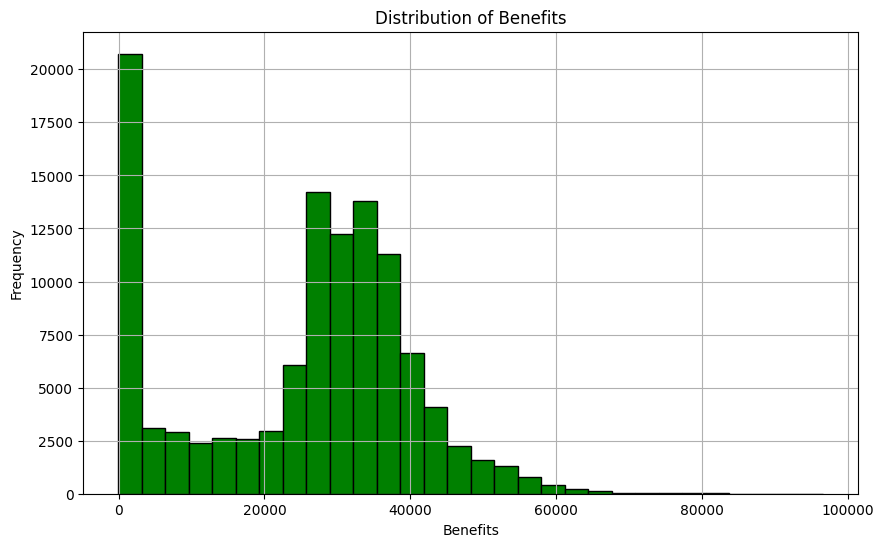

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Benefits'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Benefits')
plt.xlabel('Benefits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Since the dustribution is approximately normal distribution after zero, I will use mean 

In [15]:
mean_benefits = df['Benefits'].mean()
df['Benefits'].fillna(mean_benefits, inplace=True)

#### Notes and Status columns do not need to be plotted because all values in the two columns are nan , so I will drop them

In [16]:
df.drop(['Notes', 'Status'], axis=1, inplace=True)

In [17]:
# Ensure that the data frame does not contain NAN
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

### Task4 : Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

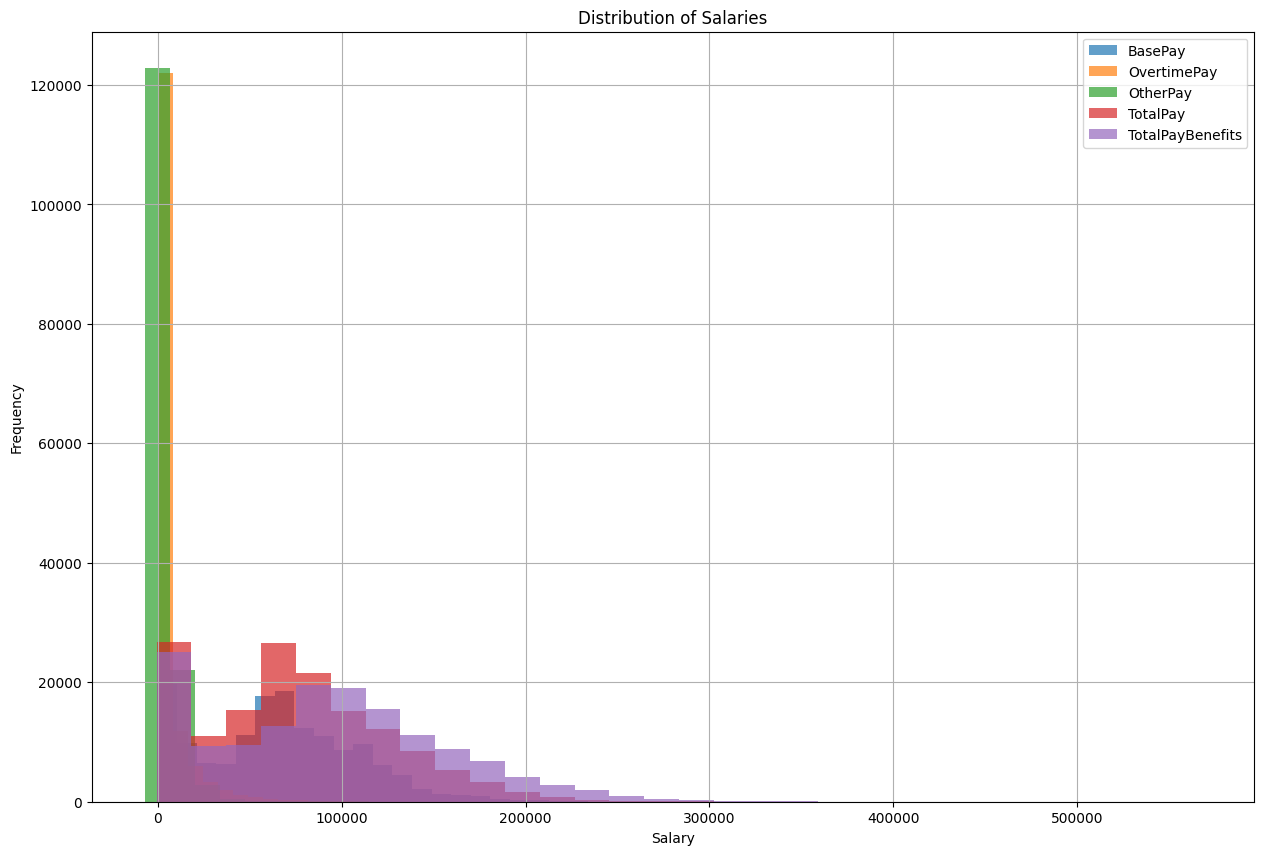

In [18]:
salary_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']
plt.figure(figsize=(15, 10))
for col in salary_columns:
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, label=col)

plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

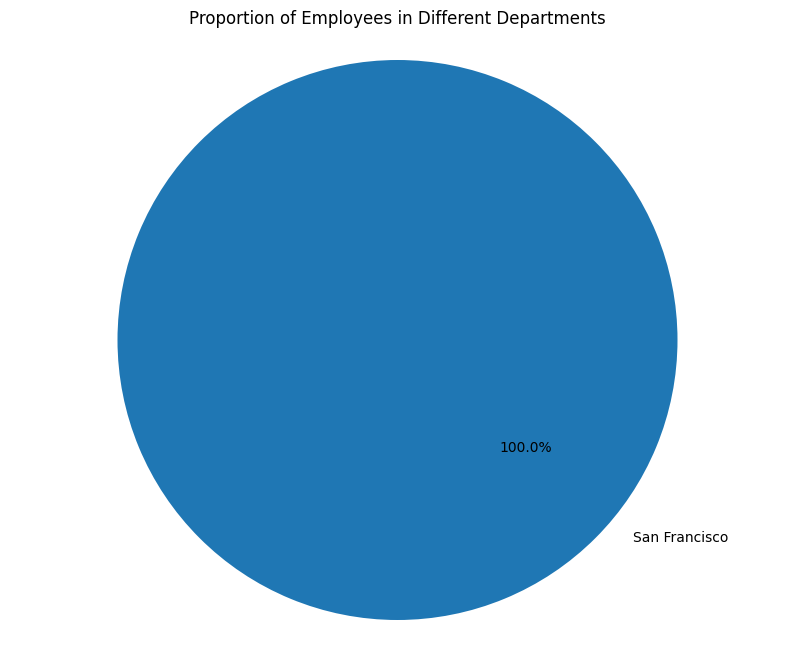

In [19]:
department_counts = df['Agency'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')  
plt.show()

### Task5 : Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

C:\Users\HP\AppData\Local\Temp\ipykernel_16720\3364788578.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

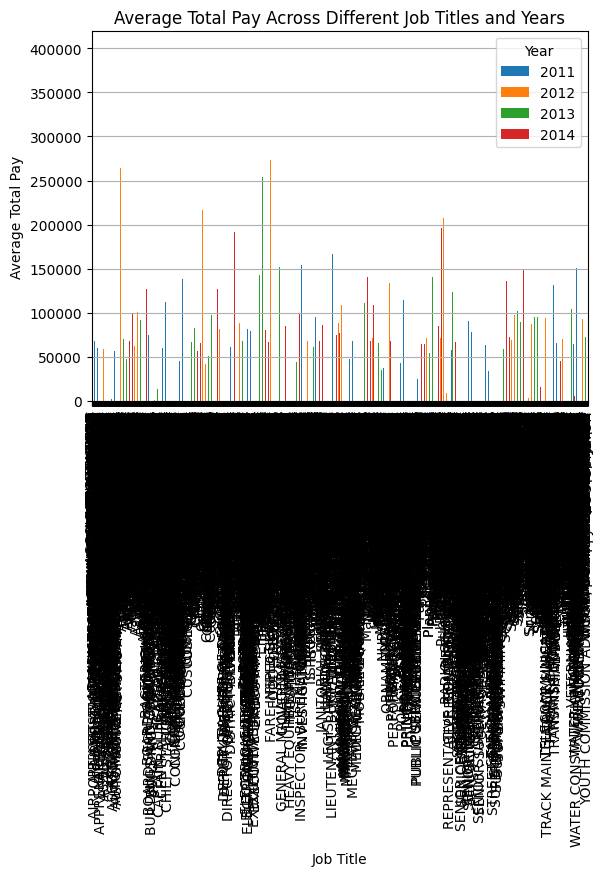

In [20]:
grouped_data = df.groupby(['JobTitle', 'Year'])
mean_salaries = grouped_data[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']].mean()

plt.figure(figsize=(12, 8))
mean_salaries['TotalPay'].unstack().plot(kind='bar', stacked=False)
plt.title('Average Total Pay Across Different Job Titles and Years')
plt.xlabel('Job Title')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Task6: Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

C:\Users\HP\AppData\Local\Temp\ipykernel_16720\1967916102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


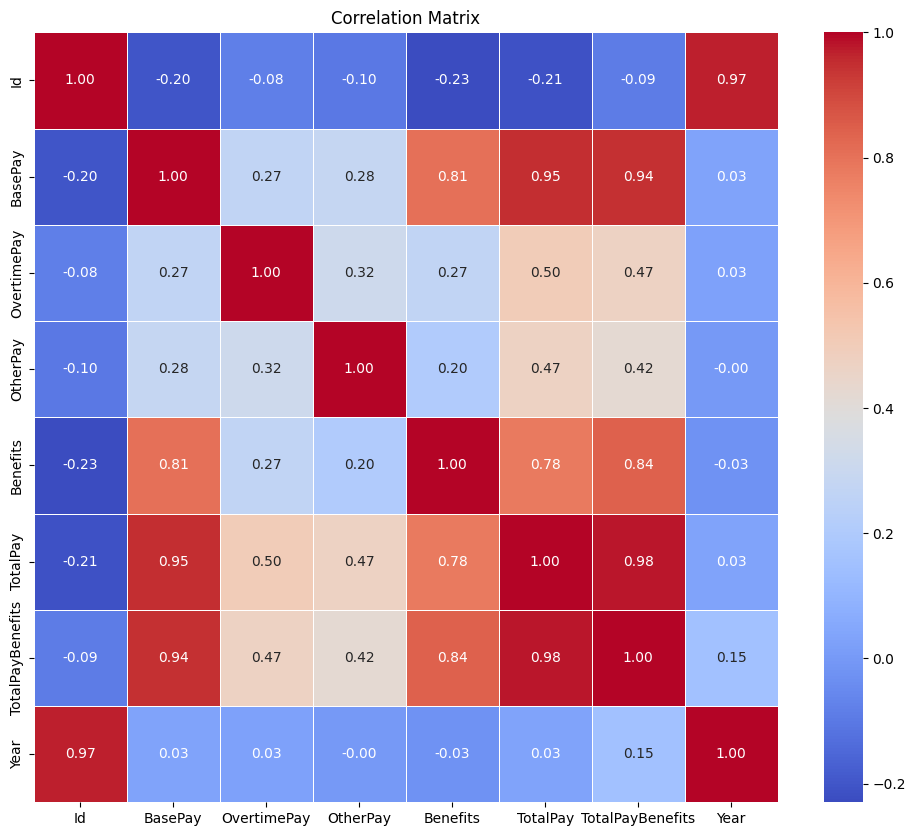

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Task7 :Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

#### Executive Summary:
##### This report presents an analysis of employee compensation within our organization based on available salary data. The analysis aims to provide insights into salary distributions, departmental proportions, and factors influencing employee compensation.

#### Key Findings:

#### Overview of Salary Distribution:
##### The dataset encompasses information on employee salaries, including base pay, overtime pay, other pay, and benefits.
##### Preliminary examination revealed missing values and potential anomalies in the data, necessitating appropriate data cleaning and imputation techniques.

#### Salary Distributions:
##### Visualizations such as histograms and bar plots were employed to explore the distribution of salaries across different components.
##### Insights from these visualizations highlight the spread and variability of salary-related components, including base pay, overtime pay, and benefits.

#### Departmental Proportions:
##### Analysis of departmental proportions revealed the composition of employees across different departments within organization.
##### The pie chart visualization offers a clear representation of the proportion of employees in each department, facilitating a better understanding of workforce distribution.

#### Average Total Pay by Job Titles and Years:
##### Bar plots were utilized to compare the average total pay across different job titles and years.
##### he analysis provides insights into salary discrepancies and trends within the organization, potentially informing decisions related to compensation structures and employee retention strategies.

#### Correlation Analysis:
##### A correlation matrix heatmap was generated to identify relationships between total pay and other numerical columns.
##### strong positive correlations were observed between total pay and related components such as base pay and benefits, indicating their significant influence on overall compensation.

#### Summary of Insights:
##### The dataset primarily consists of employees from the San Francisco agency.
##### The analyses provided insights into salary distributions, departmental proportions, and salary trends over different job titles and years.
##### Strong positive correlations between total pay and related salary components emphasize the importance of factors like benefits and base pay in determining overall compensation.